In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime,timedelta
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanAbsoluteError


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
tf.config.set_visible_devices([], 'GPU')

2025-02-22 18:02:38.534922: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-22 18:02:38.539618: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-22 18:02:38.555226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740247358.570324   74214 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740247358.574687   74214 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-22 18:02:38.591831: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Get the current working directory
cw = os.getcwd()

# Get the parent directory
parent = os.path.dirname(cw)

# Database directory
db = parent + '/database'

# Data file
test = pd.read_csv(db + '/test.csv')
train = pd.read_csv(db + '/train.csv')

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [4]:
# Remove NaN values
train = train.dropna()

# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(train))
train = train[(z_scores < 3).all(axis=1)]

# Verify the changes
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


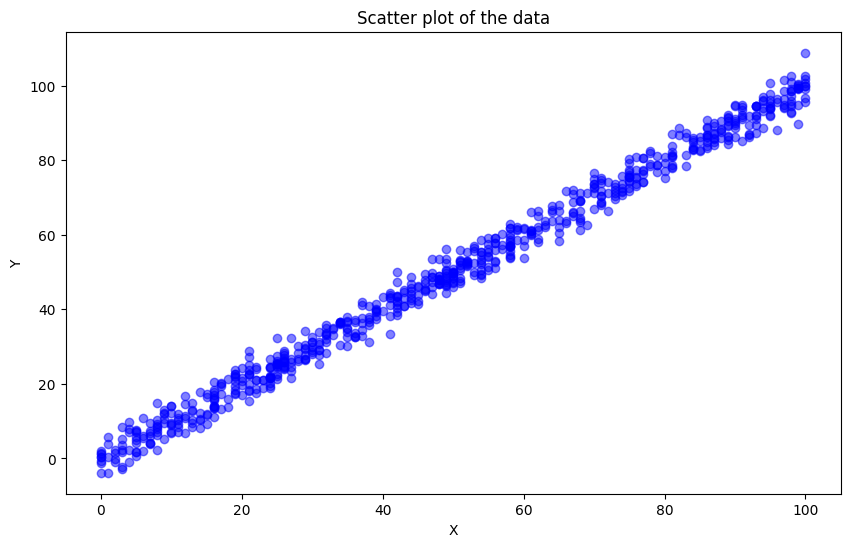

In [5]:
# Scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(train['x'], train['y'], label='Data', color='blue', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of the data')
plt.show() 

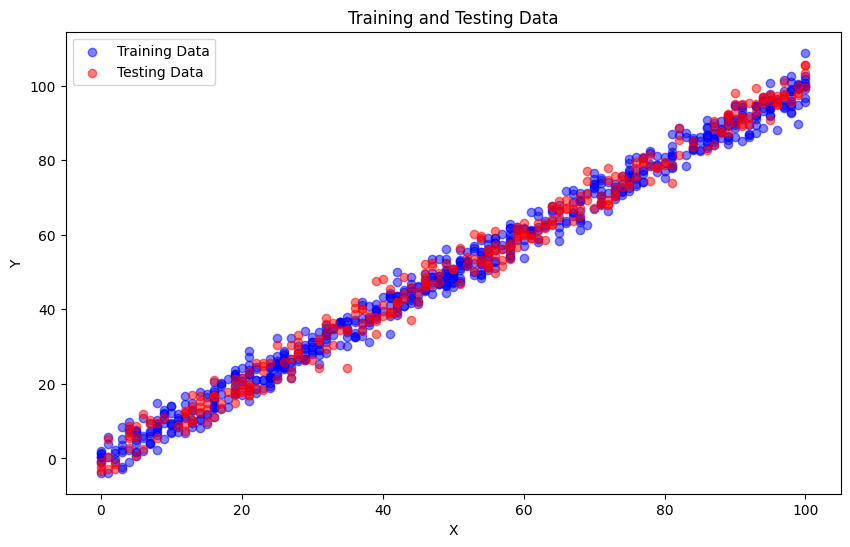

In [6]:
# Get Training Data and Testing Data
X_train = train['x'].values
y_train = train['y'].values
X_test = test['x'].values
y_test = test['y'].values


# Plot the training and testing data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Data', color='blue', alpha=0.5)
plt.scatter(X_test, y_test, label='Testing Data', color='red', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training and Testing Data')
plt.legend()
plt.show()

In [7]:
# Create a model
model = Sequential([
    Dense(100 , input_shape=(1,), activation='relu'),
    Dense(100 , activation='relu'),
    Dense(1)
])

# Compile Model
model.compile(
        optimizer=Adam(learning_rate=0.05),
        loss=MeanAbsoluteError,
        metrics=['mae']
)

# Train Model
epoch_number = 50
model.fit(tf.expand_dims(X_train,axis=1), # Because we need to give a 2 dimensional input
        y_train,
        epochs=epoch_number)

# Summary
model.summary()

/workspaces/time-series-analysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.5025 - mae: 17.5025   
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1717 - mae: 4.1717 
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8699 - mae: 2.8699 
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2050 - mae: 3.2050 
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4246 - mae: 3.4246 
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6617 - mae: 2.6617 
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9585 - mae: 2.9585 
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4766 - mae: 2.4766 
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9553 - mae: 2.9553 
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2844 - mae: 4.2844 
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7652 - mae: 4.7652 
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2680 - mae: 3.2680 
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,205 (121.90 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,804 (81.27 KB)

In [8]:
# History
history = model.history.history
print(history)

{'loss': [9.711508750915527, 3.5765371322631836, 3.566239595413208, 3.207853317260742, 3.606877326965332, 3.026672840118408, 2.756263017654419, 2.5150208473205566, 3.1618564128875732, 4.73751163482666, 4.216340065002441, 3.5154757499694824, 2.9323813915252686, 2.419396162033081, 2.7691075801849365, 3.120044231414795, 3.984637975692749, 2.965583562850952, 2.611433506011963, 2.9436073303222656, 2.7187771797180176, 2.6469476222991943, 3.174238920211792, 4.354377746582031, 2.711113452911377, 2.6150104999542236, 2.8378968238830566, 3.02207350730896, 2.4303901195526123, 2.90598201751709, 2.60623836517334, 2.2959091663360596, 2.786719799041748, 2.7392609119415283, 3.034346580505371, 3.2538883686065674, 3.627546548843384, 2.829622745513916, 2.343053102493286, 2.430510997772217, 2.4841036796569824, 2.588895559310913, 2.893972396850586, 2.5433287620544434, 2.5927298069000244, 2.4011030197143555, 2.6777055263519287, 3.237757444381714, 2.5816352367401123, 2.381165027618408], 'mae': [9.711508750915

In [9]:
y_predictions = model.predict (tf.expand_dims(X_test,axis=1))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


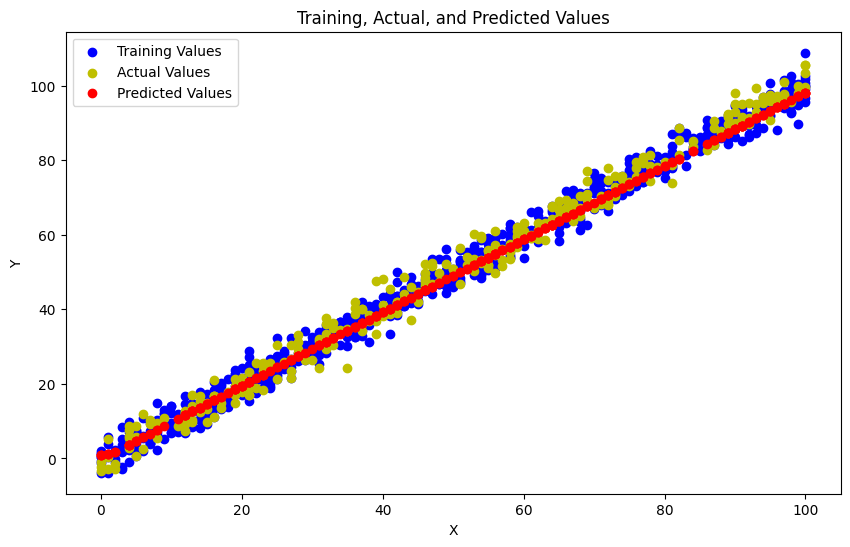

In [10]:
# Visualize the Predictions and Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='b', label='Training Values')
plt.scatter(X_test, y_test, c='y', label='Actual Values')
plt.scatter(X_test, y_predictions, c='r', label='Predicted Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training, Actual, and Predicted Values')
plt.legend()
plt.show()

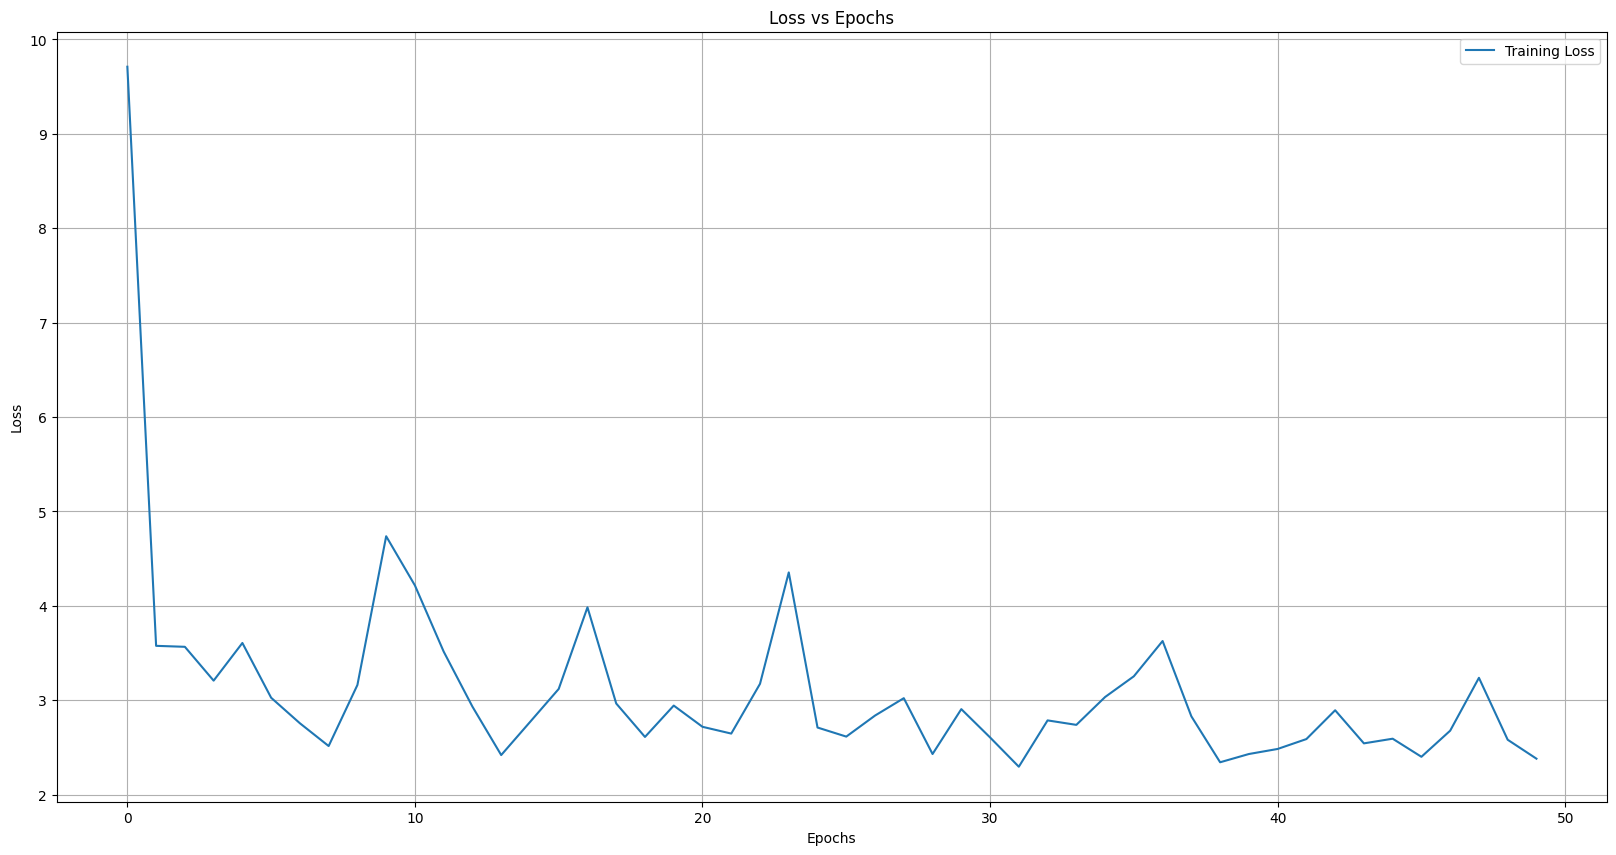

In [11]:
# Plot the loss vs epochs
plt.figure(figsize=(20, 10))
fig = plt.gcf()
plt.plot(history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid()

plt.show()